# Understanding India's Irrigation Potential

## Exploratory Data Analysis 

### Table of contents:

- [Exploration of land area and water resources in India](#Exploration of land area and water resources in India)
- [Assessment of land and water requirements for irrigation](#Assessment of land and water requirements for irrigation)
- [Analysis on the existing information on irrigation and its potential](#Analysis on the existing information on irrigation and its potential)
- [Identifying the impact of irrigation development on environment and economy](#Identifying the impact of irrigation development on environment and economy)

In [29]:
##loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

import os, sys

%matplotlib inline

In [16]:
# File with functions from prior notebook(s)
sys.path.append('G://New Projects//AsiaIrrigationPotential//')
from functions import time_slice, country_slice, subregion, variable_slice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 5 columns):
Country        25920 non-null object
Region         25920 non-null object
Time_period    25920 non-null object
variable       25920 non-null object
value          13704 non-null float64
dtypes: float64(1), object(4)
memory usage: 1012.6+ KB
['Central Asia' 'Middle East Asia' 'South Asia' 'South East Asia'
 'East Asia']


In [20]:
#reading in the data
data_wrangled = pd.read_csv('G:\\New Projects\\AsiaIrrigationPotential\\data_wrangled.csv')

In [22]:
#describing the panel
countries = data_wrangled.Country.unique()
countries
time_periods = data_wrangled.Time_period.unique()
time_periods
mid_points = range(1960,2017,5)
regions = data_wrangled.Region.unique()

In [23]:
#obtaining data for india from the wrangled data
data_india = country_slice(data_wrangled, countries[11])
data_india['mean'] = data_india.mean(axis=1)

## Exploration of land area and water resources in India

In [24]:
#mean total area of India (unit = 1000 ha)
data_india.loc['tot_area_of_country', 'mean']

328726.0

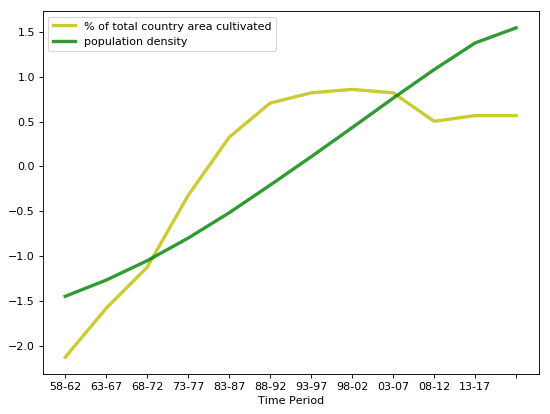

In [30]:
#% of total country area cultivated and population density with time
x1 = data_india.loc['%_tot_country_area_cultivated']
x1 = x1.drop(index = 'mean')
std_x1 = preprocessing.scale(x1)

x2 = data_india.loc['pop_density']
x2 = x2.drop(index = 'mean')
std_x2 = preprocessing.scale(x2)

plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot( x1.index, std_x1, alpha = 0.8, color = 'y', lw = 3, label = '% of total country area cultivated')
plt.plot( x1.index, std_x2, alpha = 0.8, color = 'g', lw = 3, label = 'population density')
plt.xticks(x1.index, ['58-62', '63-67', '68-72', '73-77', '83-87', '88-92', '93-97',
            '98-02', '03-07', '08-12', '13-17'])
plt.xlabel('Time Period')
plt.legend(loc ='upper left')
plt.show() 

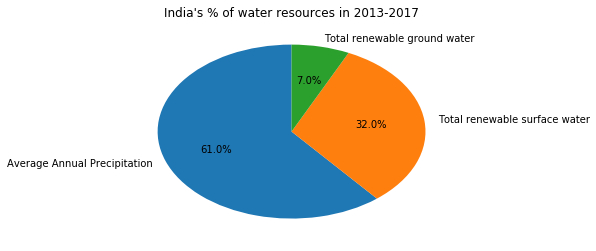

In [31]:
#water resources in 2013-2017
x3 = data_india.loc['avg_ann_ppt_in_vol', '2013-2017']
x4 = data_india.loc['%_tot_ren_sur_wat', '2013-2017']
x5 = data_india.loc['tot_ren_gr_wat', '2013-2017']

tot_wat_res = x3 + x4 + x5

x3_perct = round((x3 * 100)/tot_wat_res)
x4_perct = round((x4 * 100)/tot_wat_res)
x5_perct = round((x5 * 100)/tot_wat_res)

labels = 'Average Annual Precipitation', 'Total renewable surface water', 'Total renewable ground water'
sizes = [x3_perct, x4_perct, x5_perct]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("India's % of water resources in 2013-2017")
plt.show()

## Assessment of land and water requirements for irrigation

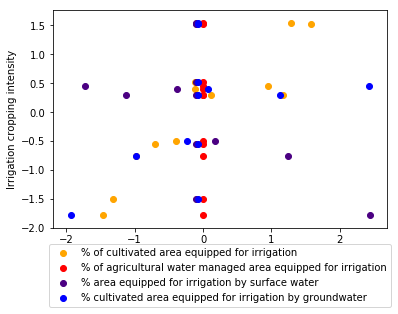

In [32]:
#areas equipped for irrigation by the type of land and water resources

#preparing data for the plot
def impute_median(series):
    return series.fillna(series.median())

x6 = data_india.loc['%_cul_area_equipped_for_irr']
x6 = x6.drop(index = 'mean')    
x6 = impute_median(x6)
std_x6 = preprocessing.scale(x6)

x7 = data_india.loc['%_agri_wat_managed_area_for_irrigation']
x7 = x7.drop(index = 'mean')
x7 = impute_median(x7)
std_x7 = preprocessing.scale(x7)

x8 = data_india.loc['%_area_irr_by_sur_wat']
x8 = x8.drop(index = 'mean')
x8 = impute_median(x8)
std_x8 = preprocessing.scale(x8)

x9 = data_india.loc['%_area_equi_for_gr_wat']
x9 = x9.drop(index = 'mean')
x9 = impute_median(x9)
std_x9 = preprocessing.scale(x9)

x10 = data_india.loc['irr_cropping_intensity']
x10 = x10.drop(index = 'mean')
x10 = impute_median(x10)
std_x10 = preprocessing.scale(x10)

#plotting
plt.subplot(1, 1, 1)
plt.scatter(std_x6, std_x10, color = 'orange', label = '% of cultivated area equipped for irrigation')
plt.scatter(std_x7, std_x10, color = 'red', label = '% of agricultural water managed area equipped for irrigation')
plt.scatter(std_x8, std_x10, color = 'indigo', label = '% area equipped for irrigation by surface water')
plt.scatter(std_x9, std_x10, color = 'blue', label = '% cultivated area equipped for irrigation by groundwater')

plt.ylabel('Irrigation cropping intensity')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.show()

## Analysis on the existing information on irrigation and its potential

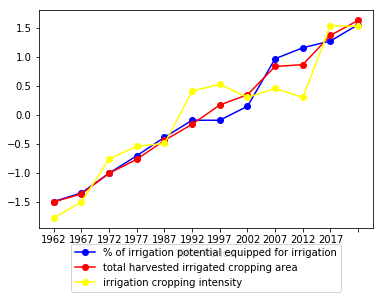

In [33]:
#exploring existing information on irrigation and its potential
x11 = data_india.loc['%_irr_pot_equipped_for_irr']
x11 = x11.drop(index = 'mean')
x11 = impute_median(x11)
std_x11 = preprocessing.scale(x11)

x12 = data_india.loc['tot_harvested_irr_crop_area']
x12 = x12.drop(index = 'mean')
x12 = impute_median(x12)
std_x12 = preprocessing.scale(x12)

plt.subplot(1, 1, 1)
plt.plot(x11.index, std_x11, color = 'blue', marker = 'o', label = '% of irrigation potential equipped for irrigation')
plt.plot(x11.index, std_x12, color = 'red', marker = 'o', label = 'total harvested irrigated cropping area')
plt.plot(x11.index, std_x10, color = 'yellow', marker = 'o', label = 'irrigation cropping intensity')
plt.xticks(x11.index, ['1962', '1967', '1972', '1977', '1987', '1992', '1997',
            '2002', '2007', '2012', '2017'])
plt.xlabel('Time Period')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.show()

## Identifying the impact of irrigation development on environment and economy

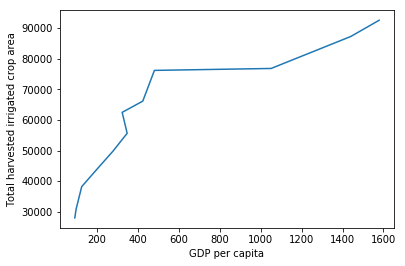

In [36]:
#impact on economy
x13 = data_india.loc['gdp_per_capita']
x13 = x13.drop(index = 'mean')

plt.plot(x13, x12)
plt.ylabel('Total harvested irrigated crop area')
plt.xlabel('GDP per capita')
plt.show()

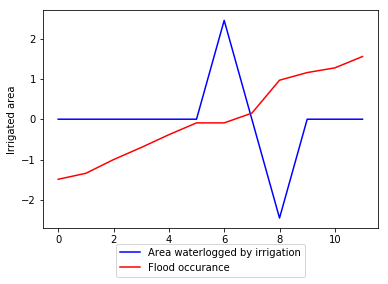

In [39]:
#impact on environment

#preparing the data 
x14 = data_india.loc['area_salnzd_irri']
x14 = x14.drop(index = 'mean')
x14 = impute_median(x14)
std_x14 = preprocessing.scale(x14)

x15 = data_india.loc['area_waterlogged_by_irr']
x15 = x15.drop(index = 'mean')
x15 = impute_median(x15)
std_x15 = preprocessing.scale(x15)

x16 = data_india.loc['flood_occurance']
x16 = x16.drop(index = 'mean')
x16 = impute_median(x11)
std_x16 = preprocessing.scale(x16)

x17 = data_india.loc['area_irr_actually_irrigated']
x17 = x17.drop(index = 'mean')
x17 = impute_median(x17)
std_x17 = preprocessing.scale(x17)

#plotting
plt.subplot(1, 1, 1)
plt.plot(std_x15,  color = 'b', label = 'Area waterlogged by irrigation')
plt.plot(std_x16, color = 'r', label = 'Flood occurance' )
plt.ylabel('Irrigated area')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.show()